In [42]:
#encoding:utf-8

%matplotlib inline
import importlib
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
import app.lib.sklearn_classification_lib as classification
import app.lib.kafka_util as kafkautil
from datetime import datetime
import json
from  app.lib.elasticsearch_util import Elasticsearch_Util
from wordcloud import WordCloud

In [43]:
LISTINGSFILE = 'app/jupyter_test/wordcloud/project.csv'
df = pd.read_csv(LISTINGSFILE,encoding='UTF-8')
print df
# print df.head(10)
# df["@timestamp"] = pd.to_datetime(df["scrape_id"].astype(str))
# df["@timestamp"] = pd.to_datetime(df["scrape_id"].astype(str)).dt.strftime('%Y-%m-%d %H:%M:%S')
df_json = df.head(1).to_json(orient='records',force_ascii=False)
print df_json
# # print df.dtypes
# df_list = json.loads(df_json)

In [44]:
# # for i in df_list:
# #     print json.dumps(i)
# kafkaProducer = kafkautil.create_producer()
# kafkautil.produce_kafka_dataframe(kafkaProducer, 'linkdata__1__node__project', df)

In [45]:
# es_util = Elasticsearch_Util()
# es_index_name = "1*"
# es_type_name = "project"
# 
# query_column_data = {"query": {
#                             "match_all": {}
#                       }
#                     }
# 
# es_util.es_read_scroll_scan(es_index_name, es_type_name, query_column_data,500)

In [79]:
import jieba
import jieba.analyse
# df.keys()
project = ' '.join(df['建议内容'.decode('utf-8')])
# print project
stopwords = open('app/jupyter_test/wordcloud/stopwords.txt').read().strip().splitlines()
print stopwords

seg = jieba.cut(project)
seg = ' '.join(seg).split()
words = ''
for word in seg:
    word = word.encode('utf-8')
    if word not in stopwords:
        words += word.strip() + ' '

words =words.decode('utf-8')
print words

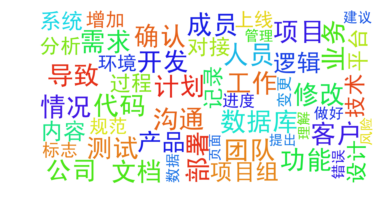

In [136]:
wordcloud = WordCloud(        #设置字体，不指定就会出现乱码
        font_path="app/jupyter_test/wordcloud/simhei.ttf",
        #font_path=path.join(d,'simsun.ttc'),
        #设置背景色
        background_color='white',
        #词云形状
        # mask=color_mask,
        #允许最大词汇
        max_words=50,
        #最大号字体
        max_font_size=150, margin=5, width=1920, height=1000)
wordcloud.generate(words.decode('utf-8'))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("app/jupyter_test/wordcloud/project.jpg")